__Import main libraries__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

__Read in csv files__

In [3]:
species = pd.read_csv(r'C:\Users\stebe\OneDrive\Fabian Unterlagen\Codeacademy\biodiversity_starter\species_info.csv')
observations = pd.read_csv(r'C:\Users\stebe\OneDrive\Fabian Unterlagen\Codeacademy\biodiversity_starter\observations.csv')

__Look at properties of the data in detail__

In [4]:
print(species.head())
print(observations.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               

In [5]:
print(species.columns)
print(observations.columns)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
Index(['scientific_name', 'park_name', 'observations'], dtype='object')


In [6]:
print(species.describe())
print(observations.describe())

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


In [7]:
print(species.info)
print(observations.info)

<bound method DataFrame.info of             category                scientific_name  \
0             Mammal  Clethrionomys gapperi gapperi   
1             Mammal                      Bos bison   
2             Mammal                     Bos taurus   
3             Mammal                     Ovis aries   
4             Mammal                 Cervus elaphus   
...              ...                            ...   
5819  Vascular Plant               Solanum parishii   
5820  Vascular Plant                  Solanum xanti   
5821  Vascular Plant         Parthenocissus vitacea   
5822  Vascular Plant              Vitis californica   
5823  Vascular Plant            Tribulus terrestris   

                                           common_names conservation_status  
0                              Gapper's Red-Backed Vole                 NaN  
1                                 American Bison, Bison                 NaN  
2     Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 N

__Looking at missing values__

In [11]:
species.isna().sum().sum()

5633

In [12]:
species[species.columns].isna().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [13]:
observations[observations.columns].isna().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

__Determine how many missing values are in the conservation_status column reative to overall column length__

In [15]:
print((species['conservation_status'].isna().sum() / len(species)) * 100)

96.72046703296702


In [16]:
species.drop('conservation_status', axis=1, inplace=True)

The calculation above shows that almost 97% of the column conservation_status of the species data frame contain missing values. It is not possible to work with that column. I cannot aply any corrections here to fill in missing values. I decided to drop the column entirely to avoid bias in my analysis. 

In [17]:
print(species.columns)

Index(['category', 'scientific_name', 'common_names'], dtype='object')


In [18]:
print(species.dtypes)
print(observations.dtypes)

category           object
scientific_name    object
common_names       object
dtype: object
scientific_name    object
park_name          object
observations        int64
dtype: object


__Calculate and visualize the number per species__

In [28]:
category = species.groupby('category').count().reset_index()

In [31]:
print(category)

            category  scientific_name  common_names
0          Amphibian               80            80
1               Bird              521           521
2               Fish              127           127
3             Mammal              214           214
4  Nonvascular Plant              333           333
5            Reptile               79            79
6     Vascular Plant             4470          4470


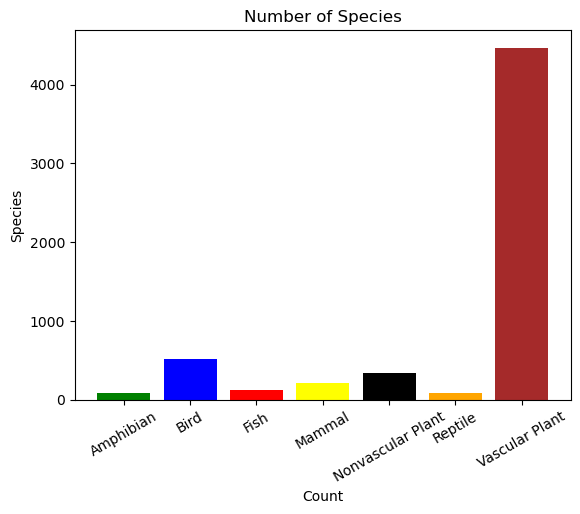

In [37]:
plt.bar(category.category, category.scientific_name, color=['green', 'blue', 'red', 'yellow', 'black', 'orange', 'brown'])
plt.title('Number of Species')
plt.xlabel('Count')
plt.ylabel('Species')
plt.xticks(rotation=30)
plt.show()

In [38]:
scientific_name = species.groupby('scientific_name').count().reset_index()

In [39]:
print(scientific_name)

                          scientific_name  category  common_names
0                           Abies bifolia         1             1
1                          Abies concolor         1             1
2                           Abies fraseri         1             1
3                    Abietinella abietina         1             1
4                       Abronia ammophila         1             1
...                                   ...       ...           ...
5536      Zonotrichia leucophrys gambelii         1             1
5537      Zonotrichia leucophrys oriantha         1             1
5538                  Zonotrichia querula         1             1
5539                 Zygodon viridissimus         1             1
5540  Zygodon viridissimus var. rupestris         1             1

[5541 rows x 3 columns]


In [40]:
print(scientific_name.scientific_name.nunique())

5541


__Calculate the number of observation per park__

In [41]:
park = observations.groupby('park_name').count().reset_index()

In [42]:
print(park)

                             park_name  scientific_name  observations
0                  Bryce National Park             5824          5824
1  Great Smoky Mountains National Park             5824          5824
2            Yellowstone National Park             5824          5824
3               Yosemite National Park             5824          5824


This shows no ressult as the numer of observations is equal for each park.

In [44]:
merged = species.merge(observations, on='scientific_name')

In [45]:
print(merged.head())

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
4   Mammal                      Bos bison     American Bison, Bison   

                             park_name  observations  
0                  Bryce National Park           130  
1            Yellowstone National Park           270  
2  Great Smoky Mountains National Park            98  
3               Yosemite National Park           117  
4               Yosemite National Park           128  


In [48]:
merged.drop_duplicates()

,category,scientific_name,common_names,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",Yosemite National Park,128
...,...,...,...,...,...
25627,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",Yellowstone National Park,237
25628,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",Great Smoky Mountains National Park,50
25629,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",Yellowstone National Park,239
25630,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",Bryce National Park,111


In [49]:
park = merged.groupby('park_name').count().reset_index()

In [50]:
print(park)

                             park_name  category  scientific_name  \
0                  Bryce National Park      6408             6408   
1  Great Smoky Mountains National Park      6408             6408   
2            Yellowstone National Park      6408             6408   
3               Yosemite National Park      6408             6408   

   common_names  observations  
0          6408          6408  
1          6408          6408  
2          6408          6408  
3          6408          6408  


I have trouble moving onfrom here. Lets call it an end.